<a href="https://colab.research.google.com/github/Htetmin5235/myfirstproject/blob/master/PK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [0]:
data = pd.read_csv("vgsales.csv")

In [10]:
data.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [11]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [12]:
data.shape

(16598, 11)

In [13]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [33]:
data.describe() 

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [0]:
d = data[["Name", "Year", "Publisher"]]
d = d.dropna(axis=0, how="any")

In [15]:
d.head()

,Name,Year,Publisher
0,Wii Sports,2006.0,Nintendo
1,Super Mario Bros.,1985.0,Nintendo
2,Mario Kart Wii,2008.0,Nintendo
3,Wii Sports Resort,2009.0,Nintendo
4,Pokemon Red/Pokemon Blue,1996.0,Nintendo


In [16]:
d.shape

(16291, 3)

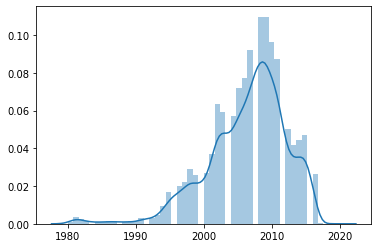

In [18]:
sns.distplot(d[["Year"]]);

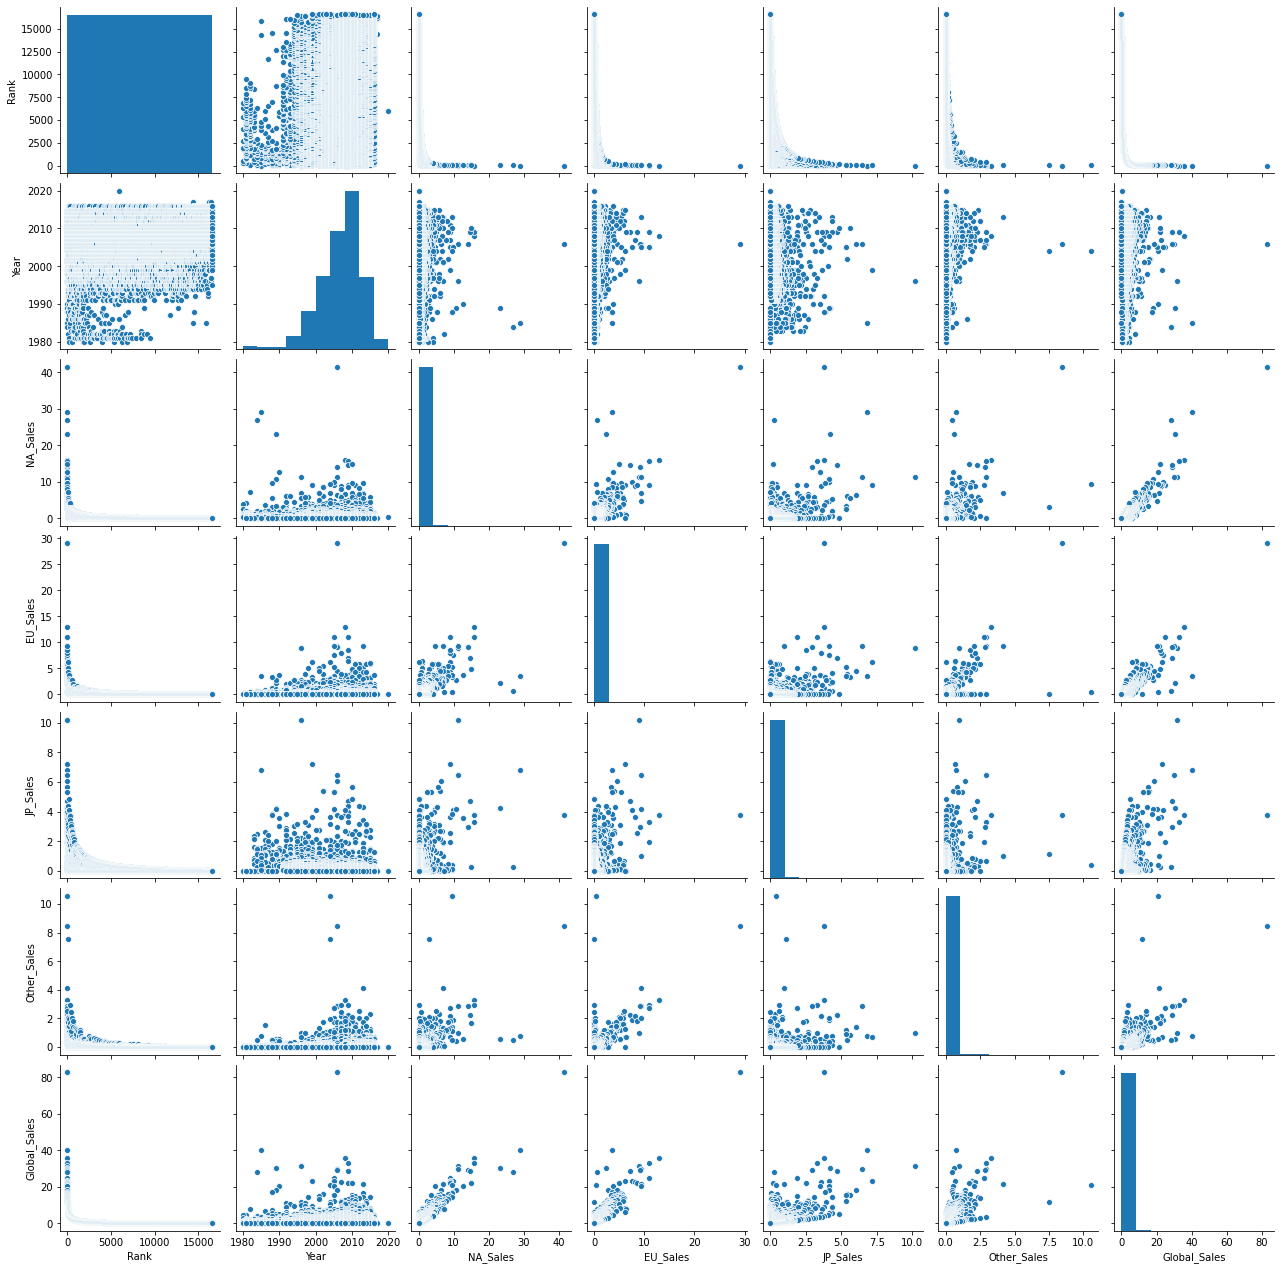

In [32]:
sns.pairplot(data)

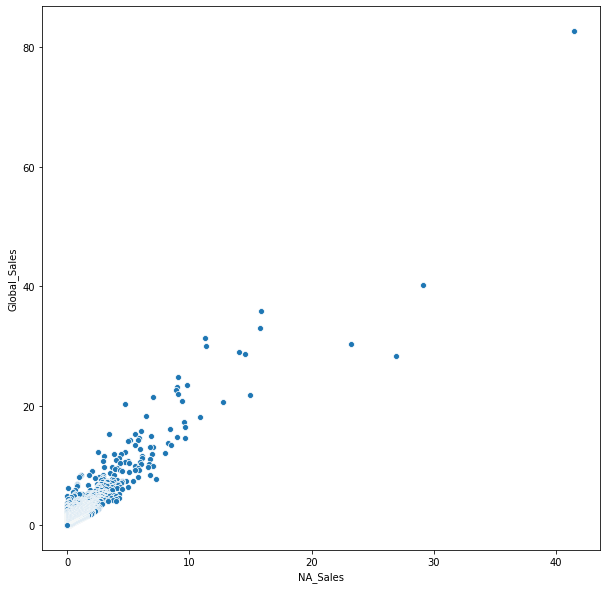

In [34]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='NA_Sales', y='Global_Sales', data=data)

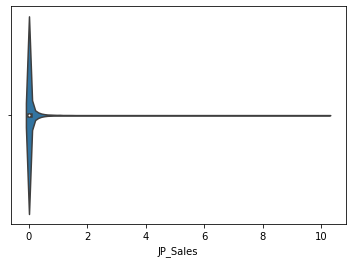

In [37]:
sns.violinplot(x=data['JP_Sales'])

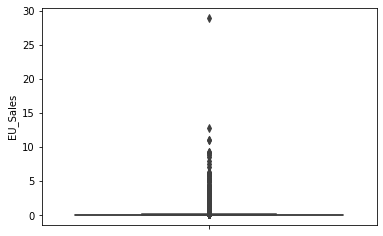

In [39]:
sns.boxplot(y=data['EU_Sales'])

In [40]:
data.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178814,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,0.178814,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.401362,-0.091402,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.006014,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,-0.169316,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.041058,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,-0.074735,0.941047,0.902836,0.611816,0.748331,1.000000


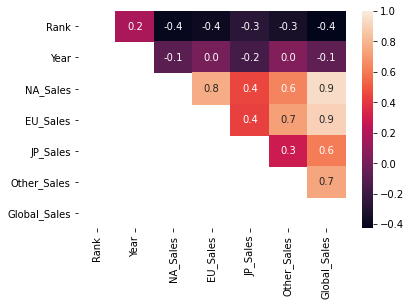

In [41]:
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.1f')

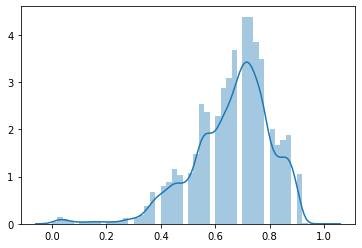

In [19]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc_data = sc.fit_transform(d[["Year"]])
sns.distplot(sc_data)

In [0]:
d["Year_SCALED"] = sc_data

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [0]:
le = LabelEncoder()
year_le = le.fit_transform(d["Year"])

In [26]:
np.unique(year_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38])

In [27]:
le.inverse_transform(np.unique(year_le))

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016., 2017., 2020.])

In [0]:
d["Year_INDEX"] = year_le

In [0]:
ohe = OneHotEncoder()
year_ohe = ohe.fit_transform(d[["Year"]])

In [30]:
ohe_names = ohe.get_feature_names()
ohe_names

array(['x0_1980.0', 'x0_1981.0', 'x0_1982.0', 'x0_1983.0', 'x0_1984.0',
       'x0_1985.0', 'x0_1986.0', 'x0_1987.0', 'x0_1988.0', 'x0_1989.0',
       'x0_1990.0', 'x0_1991.0', 'x0_1992.0', 'x0_1993.0', 'x0_1994.0',
       'x0_1995.0', 'x0_1996.0', 'x0_1997.0', 'x0_1998.0', 'x0_1999.0',
       'x0_2000.0', 'x0_2001.0', 'x0_2002.0', 'x0_2003.0', 'x0_2004.0',
       'x0_2005.0', 'x0_2006.0', 'x0_2007.0', 'x0_2008.0', 'x0_2009.0',
       'x0_2010.0', 'x0_2011.0', 'x0_2012.0', 'x0_2013.0', 'x0_2014.0',
       'x0_2015.0', 'x0_2016.0', 'x0_2017.0', 'x0_2020.0'], dtype=object)

In [31]:
d.head(10)

,Name,Year,Publisher,Year_SCALED,Year_INDEX
0,Wii Sports,2006.0,Nintendo,0.650,26
1,Super Mario Bros.,1985.0,Nintendo,0.125,5
2,Mario Kart Wii,2008.0,Nintendo,0.700,28
3,Wii Sports Resort,2009.0,Nintendo,0.725,29
4,Pokemon Red/Pokemon Blue,1996.0,Nintendo,0.400,16
5,Tetris,1989.0,Nintendo,0.225,9
6,New Super Mario Bros.,2006.0,Nintendo,0.650,26
7,Wii Play,2006.0,Nintendo,0.650,26
8,New Super Mario Bros. Wii,2009.0,Nintendo,0.725,29
9,Duck Hunt,1984.0,Nintendo,0.100,4
